In [1]:
import glob 
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

### Load in the data

In [2]:
training_data = glob.glob('/home/bnovak/projects/VAE_training/small_384_model/training_data/384/*')

data = []

for i in training_data[::100]:
    data.append(np.loadtxt(i))
    
data = np.array(data)
mean_data = np.mean(data, axis=0)
std_data = np.std(data, axis=0)
max_data = np.max(data, axis=0)

In [38]:
# np.save('../data/mean_384_dataset.npy', mean_data)
# np.save('../data/std_384_dataset.npy', std_data)

In [5]:
### Standardize_the_data

std_data[std_data.round(3) == 0] = 1

data_standard = (data - mean_data) / std_data

In [ ]:
### Normalize the data

max_standard = np.max(data_standard, axis=0)
min_standard = np.min(data_standard, axis=0)

denominator = max_standard - min_standard
denominator[denominator.round(3) == 0] = 1

data_normal = (data_standard - min_standard) / denominator
[np.fill_diagonal(i, 0) for i in data_normal]

In [40]:
# np.save('../data/max_standard_384_dataset.npy', max_standard)
# np.save('../data/min_standard_384_dataset.npy', min_standard)

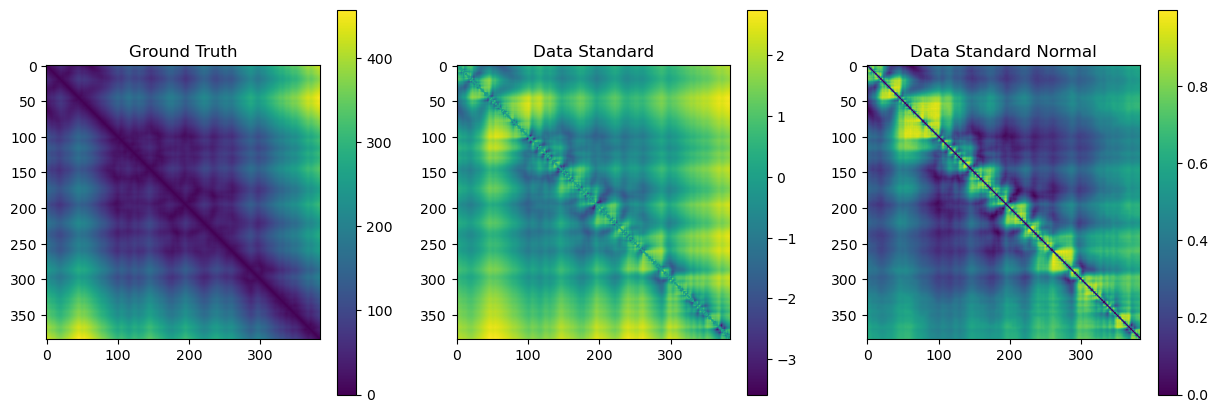

In [37]:
import matplotlib.pyplot as plt

example = 1000

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot data1 in the first subplot
gt = axes[0].imshow(data[example], cmap='viridis')
axes[0].set_title('Ground Truth')
fig.colorbar(gt, ax=axes[0])

# Plot data1 in the first subplot
gt = axes[1].imshow(data_standard[example], cmap='viridis')
axes[1].set_title('Data Standard')
plt.colorbar(gt, ax=axes[1])

# Plot data1 in the first subplot
gt = axes[2].imshow(data_normal[example], cmap='viridis')
axes[2].set_title('Data Standard Normal')
plt.colorbar(gt, ax=axes[2])